# Univariate Imputation of Numerical Column

### Techniques
1. Mean/Median
2. Abitrary Value
3. End of distribution
4. Random ValueS

1. **Mean :** Replacing values with mean of the attribute is very simple technique but, the problem with this technique.
    1. it will change the orignal distribution of data. 
    2. it causes outliers in data.
    3. Covariance/Correlation changes - it can change the relationship of attribute with other attributes.
  
  **When to use :**
  1. When data is missing completely at random (MCAR).
  2. When data is missing upto 5%.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('titanic_toy.csv')
data.shape

(891, 4)

In [3]:
df = data.copy()
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X.shape, y.shape

((891, 3), (891,))

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 3), (712,), (179, 3), (179,))

In [10]:
X_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [11]:
X_test.isnull().mean()

Age       0.206704
Fare      0.050279
Family    0.000000
dtype: float64

In [16]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_Fare = X_train['Fare'].mean()
median_Fare = X_train['Fare'].median()
mean_age,median_age, mean_Fare, median_fare

(29.498846153846156, 28.0, 32.51778772189349, 14.4)

In [17]:
X_train['age_mean'] = X_train['Age'].fillna(mean_age)
X_train['age_median'] = X_train['Age'].fillna(median_age)

X_train['fare_mean'] = X_train['Fare'].fillna(mean_Fare)
X_train['fare_median'] = X_train['Fare'].fillna(median_Fare)

In [20]:
X_train.sample(5)

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
570,62.0,10.5000,0,62.000000,62.0,10.500000,10.5000
241,NaN,15.5000,1,29.498846,28.0,15.500000,15.5000
135,23.0,15.0458,0,23.000000,23.0,15.045800,15.0458
490,NaN,NaN,1,29.498846,28.0,32.517788,14.4000
115,21.0,7.9250,0,21.000000,21.0,7.925000,7.9250


In [24]:
print('-'*40, "Age Attribute", "-"*40)
print('Orignal Age Variable Variance : ', X_train['Age'].var())
print('Age Variance after Mean imputation: ', X_train['age_mean'].var())
print('Age Variance after Median imputation: ', X_train['age_median'].var())
print("="*100)
print('-'*40, "Fare Attribute", "-"*40)
print('Orignal Fare Variable Variance : ', X_train['Fare'].var())
print('Fare Variance after Mean imputation: ', X_train['fare_mean'].var())
print('Fare Variance after Median imputation: ', X_train['fare_median'].var())

---------------------------------------- Age Attribute ----------------------------------------
Orignal Age Variable Variance :  210.2517072477438
Age Variance after Mean imputation:  168.8519336687225
Age Variance after Median imputation:  169.20731007048096
---------------------------------------- Fare Attribute ----------------------------------------
Orignal Fare Variable Variance :  2761.031434948639
Fare Variance after Mean imputation:  2621.2323749512393
Fare Variance after Median imputation:  2637.01248167777


- it can be seen that if the proportion of missing values is greater than 5% of total data replacing them with mean/median a drastic change can be seen in the distribution of attribute. for instance Age attribute in our case, because the variance shrinks toward the mean because most of the values are replaced with mean/median value. whereas the Fare attribute doesn't change its shape because the proportio of missing values are 5% of total data.

In [26]:
import matplotlib.pyplot as plt

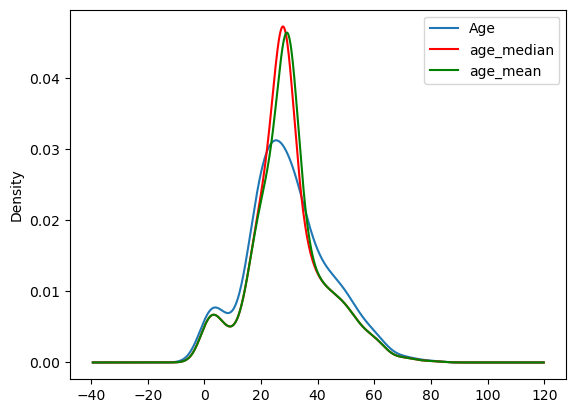

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Age'].plot(kind='kde', ax=ax)
X_train['age_median'].plot(kind='kde', ax=ax, color='red')
X_train['age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

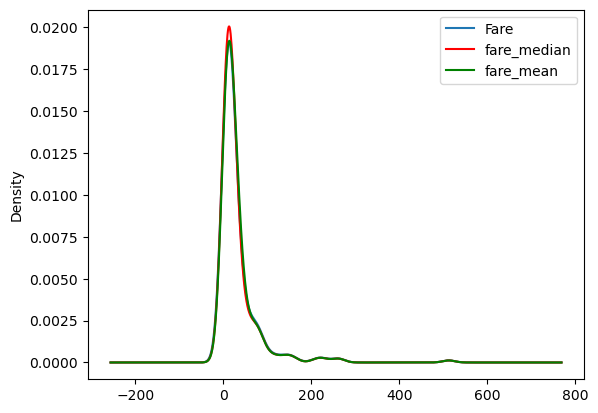

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Fare'].plot(kind='kde', ax=ax)
X_train['fare_median'].plot(kind='kde', ax=ax, color='red')
X_train['fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [30]:
X_train.cov()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [32]:
X_train.corr()

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
fare_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
fare_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


<Axes: >

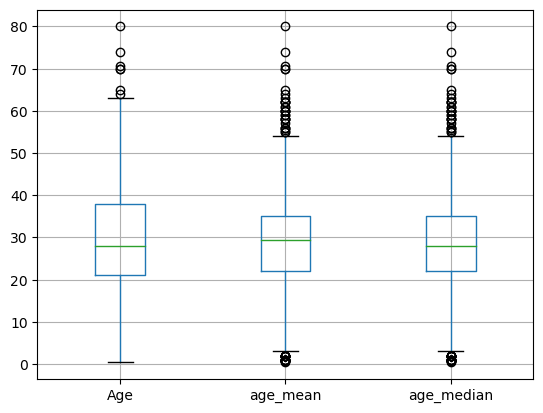

In [33]:
X_train[['Age','age_mean','age_median']].boxplot()

<Axes: >

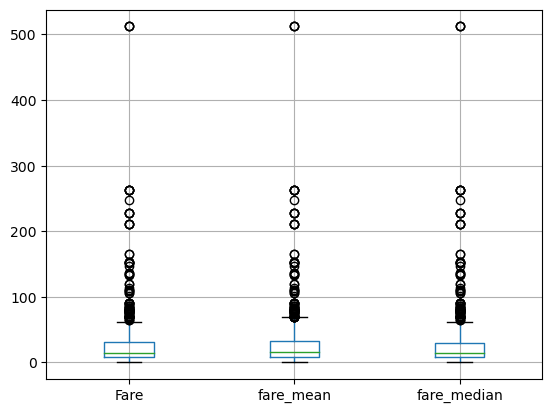

In [34]:
X_train[['Fare','fare_mean','fare_median']].boxplot()

**After mean/median imputation in Age attribute we can see the number of outliers has increased compare to orignal data, but incase of Fare attribute there is no change in data it preserved the orignal shape of data.**

## Using Sklearn

In [36]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [38]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [39]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [40]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [41]:
trf.named_transformers_['imputer2'].statistics_

array([32.51778772])

In [43]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [44]:
X_train

array([[ 45.5       ,  28.5       ,   0.        ],
       [ 23.        ,  13.        ,   0.        ],
       [ 32.        ,   7.925     ,   0.        ],
       ...,
       [ 41.        ,  32.51778772,   2.        ],
       [ 14.        , 120.        ,   3.        ],
       [ 21.        ,  77.2875    ,   1.        ]])